## Final Project Submission
* Student name: Charles Owiti, Noel Seda, Michelle Chekwoti , Alex Mwera
* Student pace: part time
* Scheduled project review date/time: 
* Instructor name: Mildred Jepkosgei

## Business Problem: 

Our company has noticed that major corporations are investing in original video content, and we want to join in on the trend. To do so, we’ve decided to launch our own movie studio. However, we have little to no experience in filmmaking.  

Our task is to analyze which types of films are currently performing best at the box office. Based on our findings, we will translate the data into actionable insights that will help our studio head make informed decisions about the types of films we should produce.

#### Objectives:
- Analyze movie ratings and subscription trends to identify top-performing films.
- Provide business recommendations on popular genres that attract large audiences.
- Assess user feedback for insights into audience preferences.
- Identify high-rated genres with strong potential for success.

The Aim: is to analyse the movie industry to find the gaps in original video content that will allow our new studio to create succesful films.

## Data Understanding

In [1]:
# Importing the relevant libraries
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import numpy as np

In [2]:
# Connecting to the IMDB database
conn = sqlite3.connect('im.db')
cur = conn.cursor()

In [4]:
# View database tables
tables_query = """SELECT name 
                      AS 'Table Names' 
                      FROM sqlite_master 
                      WHERE type='table';"""

pd.read_sql(tables_query, conn)

,Table Names
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers


We have identified 7 tables in the database, and we will focus on the Movie_basics and Movie_ratings in our analysis.

In [5]:
#Overview of the Movie basics table
movie_basics_query = """SELECT * FROM movie_basics ;"""

pd.read_sql(movie_basics_query, conn)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [6]:
#Overview of the Movie ratings table.
movie_ratings_query = """SELECT * FROM movie_ratings ;"""

pd.read_sql(movie_ratings_query, conn)

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


The Movie basics table consists of:
- `movie_Id`: The unique id for each movie and the Primary Key.
- `primary_title`: The title of the movie.
- `genres`: The genre(s) of the movie.
  
The Movie ratings table consists of:
- `average_rating`: The average rating given by users.
- `num_votes`: The number of votes a movie has received.
    
Our goal is to analyze the relationships between ratings, votes, and genres and performance of the movies overtime.

## Data Preparation and Cleaning

To do this we are joining the movie_basics table and movie_ratings table into one database, using an inner join. This will make sure match rows from both tables will be joined and eliminate all movie_basics without ratings on the movie_ratings table.

In [7]:
#INNER Join with movie basics and movie_ratings
data_preparation_query = """
SELECT mb.movie_id ,mb.primary_title, mb.original_title, mb.start_year, mb.runtime_minutes, mb.genres, mr.averagerating, mr.numvotes 
FROM movie_basics AS mb 
INNER JOIN movie_ratings as mr ON mr.movie_id = mb.movie_id
;"""

#Overview of the new Movies table
movies_df = pd.read_sql(data_preparation_query, conn)
movies_df

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
...,...,...,...,...,...,...,...,...
73851,tt9913084,Diabolik sono io,Diabolik sono io,2019,75.0,Documentary,6.2,6
73852,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,"Drama,Family",8.7,136
73853,tt9914642,Albatross,Albatross,2017,NaN,Documentary,8.5,8
73854,tt9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,NaN,None,6.6,5


In [8]:
# check the datatypes to avoid errors
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         73856 non-null  object 
 1   primary_title    73856 non-null  object 
 2   original_title   73856 non-null  object 
 3   start_year       73856 non-null  int64  
 4   runtime_minutes  66236 non-null  float64
 5   genres           73052 non-null  object 
 6   averagerating    73856 non-null  float64
 7   numvotes         73856 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 4.5+ MB


In [9]:
# Check Null Values
movies_df.isnull().sum()

movie_id              0
primary_title         0
original_title        0
start_year            0
runtime_minutes    7620
genres              804
averagerating         0
numvotes              0
dtype: int64

They are multiple runtime minutes and genres, fill null genres with `unknown`

In [10]:
# Fill empty null genres with 'Unknown'
movies_df['genres'] = movies_df['genres'].fillna('unknown')
movies_df

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
...,...,...,...,...,...,...,...,...
73851,tt9913084,Diabolik sono io,Diabolik sono io,2019,75.0,Documentary,6.2,6
73852,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,"Drama,Family",8.7,136
73853,tt9914642,Albatross,Albatross,2017,NaN,Documentary,8.5,8
73854,tt9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,NaN,unknown,6.6,5


Fill the null values in the runtime_minutes column with the mean of the runtime_minutes column


In [11]:
movies_df['runtime_minutes'] = movies_df['runtime_minutes'].fillna(movies_df['runtime_minutes'].mean())
movies_df

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.00000,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.00000,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.00000,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,94.65404,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.00000,"Comedy,Drama,Fantasy",6.5,119
...,...,...,...,...,...,...,...,...
73851,tt9913084,Diabolik sono io,Diabolik sono io,2019,75.00000,Documentary,6.2,6
73852,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.00000,"Drama,Family",8.7,136
73853,tt9914642,Albatross,Albatross,2017,94.65404,Documentary,8.5,8
73854,tt9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,94.65404,unknown,6.6,5


In [12]:
# Check for Duplicates
movies_df.duplicated().value_counts()

False    73856
Name: count, dtype: int64

There are no duplicates in the data.

#### Mean of the average ratings

In [13]:
mu = movies_df['averagerating'].mean()
mu

np.float64(6.332728552859619)

In [14]:
# Split genres into a list
movies_df["genres"] = movies_df["genres"].str.split(",")

This splits the genres like the Sunghursh (Original_title) into Action,Crime and Drama 

In [15]:
genre_df=movies_df.explode('genres')
genre_df

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.00000,Action,7.0,77
0,tt0063540,Sunghursh,Sunghursh,2013,175.00000,Crime,7.0,77
0,tt0063540,Sunghursh,Sunghursh,2013,175.00000,Drama,7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.00000,Biography,7.2,43
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.00000,Drama,7.2,43
...,...,...,...,...,...,...,...,...
73852,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.00000,Drama,8.7,136
73852,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.00000,Family,8.7,136
73853,tt9914642,Albatross,Albatross,2017,94.65404,Documentary,8.5,8
73854,tt9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,94.65404,unknown,6.6,5


In [16]:
# Provide Summary Statistics
genre_df.describe()

,start_year,runtime_minutes,averagerating,numvotes
count,129294.000000,129294.000000,129294.000000,1.292940e+05
mean,2014.218371,95.014320,6.303352,5.304729e+03
std,2.579059,150.068052,1.458034,3.797311e+04
min,2010.000000,3.000000,1.000000,5.000000e+00
25%,2012.000000,83.000000,5.400000,1.600000e+01
50%,2014.000000,93.000000,6.400000,6.400000e+01
75%,2016.000000,103.000000,7.300000,4.230000e+02
max,2019.000000,51420.000000,10.000000,1.841066e+06


#### Top-rated movies

In [17]:

# Top-rated movies
top_movies = movies_df.sort_values(by=["averagerating", "numvotes"], ascending=[False, False]).head(10)
top_movies[["primary_title", "averagerating", "numvotes"]]

,primary_title,averagerating,numvotes
73616,Renegade,10.0,20
50085,Revolution Food,10.0,8
51109,Fly High: Story of the Disc Dog,10.0,7
42970,I Was Born Yesterday!,10.0,6
53408,All Around Us,10.0,6
65755,Ellis Island: The Making of a Master Race in A...,10.0,6
65944,Calamity Kevin,10.0,6
702,Exteriores: Mulheres Brasileiras na Diplomacia,10.0,5
878,The Dark Knight: The Ballad of the N Word,10.0,5
9745,Freeing Bernie Baran,10.0,5


## Data Visualization

### Distribution of movie ratings

/tmp/ipykernel_428082/1617399687.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(movies_df['averagerating'],kde=True,palette='GnBu')


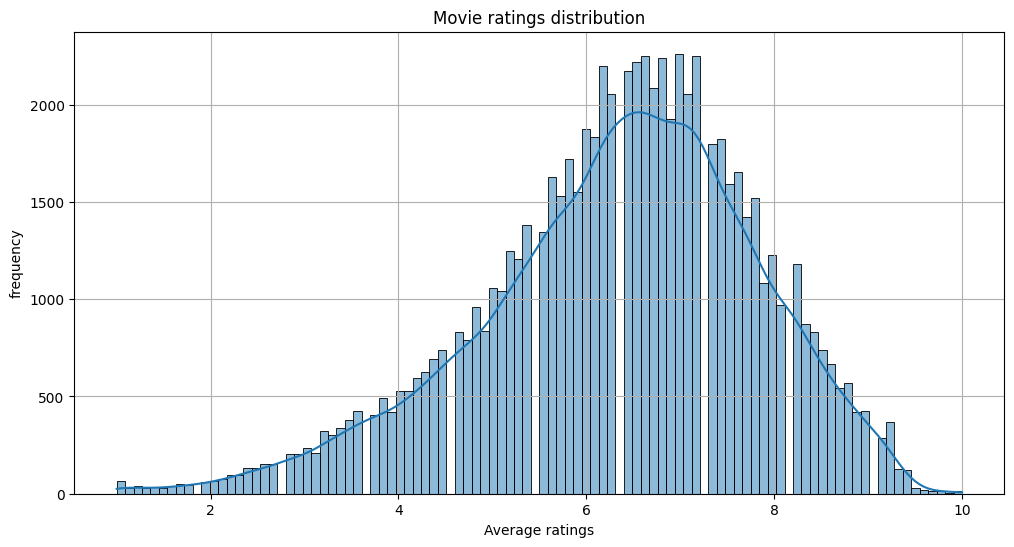

In [18]:
# Set figure size
plt.figure(figsize=(12,6))

# Create histogram with KDE
sns.histplot(movies_df['averagerating'],kde=True,palette='GnBu')

# Add labels and title
plt.title("Movie ratings distribution")
plt.xlabel("Average ratings")
plt.ylabel('frequency')

# Add grid and show plot
plt.grid()
plt.show()

From the graph above we concluded that our movie ratings are normaly distributed with the average ratings around the mean

The graph is rightly skewed towards the positive

Distribution of movie runtime

/tmp/ipykernel_428082/2312552853.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=movies_df['averagerating'], palette='GnBu')


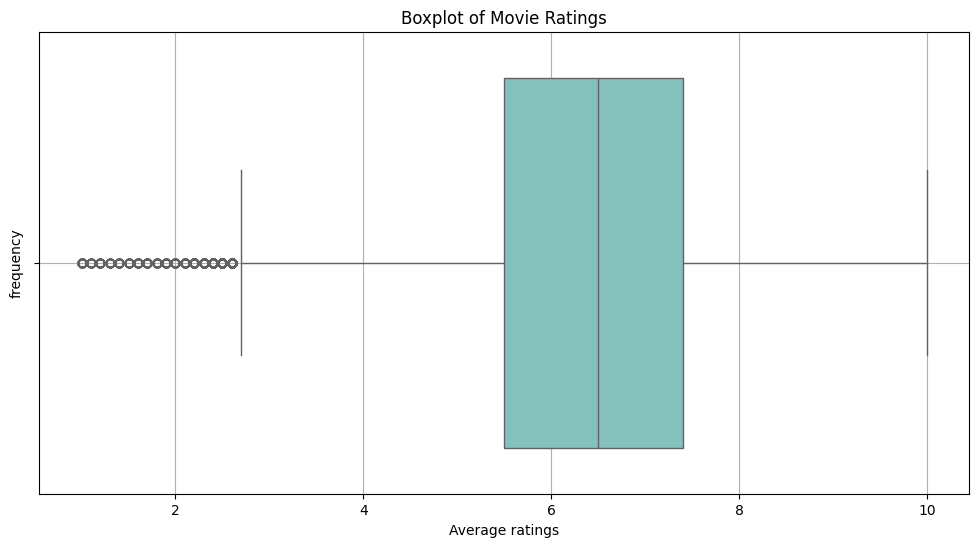

In [22]:

# Create boxplot
plt.figure(figsize=(12,6))
sns.boxplot(x=movies_df['averagerating'], palette='GnBu')
# Add labels and title
plt.title("Boxplot of Movie Ratings")
plt.xlabel("Average ratings")
plt.ylabel('frequency')
# Add grid and show plot
plt.grid()
plt.show()

The boxplot provides a visual representation of the distribution of movie ratings. The central line in the box represents the median rating, while the edges of the box represent the first (Q1) and third quartiles (Q3). The "whiskers" extend to show the range of the data, excluding outliers. Outliers are represented as individual points outside the whiskers. This plot helps identify the spread and skewness of movie ratings, as well as any potential outliers.

### Bar plot for the  average movie ratings for each genre 

/tmp/ipykernel_428082/2959577000.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_avg_rating.index, y=genre_avg_rating.values, palette="viridis")


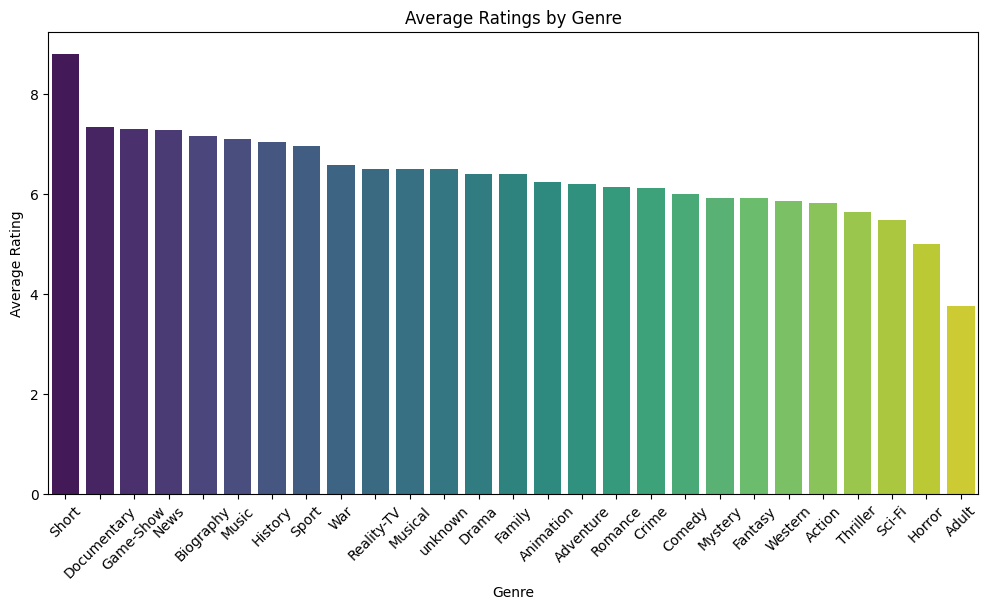

In [20]:
# Grouping by 'genres' and calculating the mean of 'averagerating'
genre_avg_rating = genre_df.groupby("genres")["averagerating"].mean().sort_values(ascending=False)

# Set figure size
plt.figure(figsize=(12,6))

# Create barplot to display average rating per genre
sns.barplot(x=genre_avg_rating.index, y=genre_avg_rating.values, palette="viridis")

# Rotating x-axis labels
plt.xticks(rotation=45)

# Add labels and title
plt.title("Average Ratings by Genre")
plt.xlabel("Genre")
plt.ylabel("Average Rating")

# Show plot
plt.show()

From the graph the highest average rating goes to short films

The top-five geners to be concidered are short films,Documentary,Game-Show,News

### Scatter Plot for the relationship Between Movie Ratings and Number of Votes

/tmp/ipykernel_116902/4070472376.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(y=genre_df['numvotes'],x=genre_df['averagerating'],palette='GnBu',alpha=0.5)


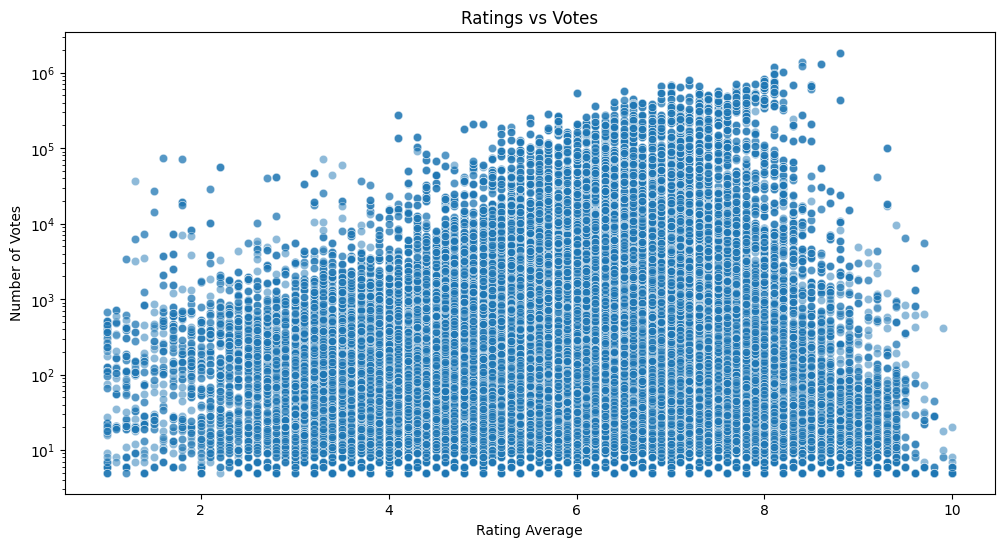

In [22]:
# Set the figure size
plt.figure(figsize=(12,6))

# Creating a scatter plot to show the relationship between ratings and number of votes
sns.scatterplot(y=genre_df['numvotes'],x=genre_df['averagerating'],palette='GnBu',alpha=0.5)

# Using a logarithmic scale for the y-axis to handle large variations in vote counts
plt.yscale('log')

# Add labels and title
plt.title('Ratings vs Votes')
plt.ylabel('Number of Votes')
plt.xlabel('Rating Average')

# Show plot
plt.show()


In [23]:
# Grouping the data by 'genres'
genre_stats = genre_df.groupby('genres').agg({ 'movie_id': 'count', 'averagerating': 'mean', 'numvotes': 'sum' }).reset_index()

genre_stats

,genres,movie_id,averagerating,numvotes
0,Action,6988,5.810361,101161682
1,Adult,3,3.766667,164
2,Adventure,3817,6.196201,84232589
3,Animation,1743,6.248308,15353302
4,Biography,3809,7.162274,21609446
5,Comedy,17290,6.002689,74305805
6,Crime,4611,6.115441,39631356
7,Documentary,17753,7.332090,4739345
8,Drama,30788,6.401559,119567500
9,Family,3412,6.394725,8636710


In [24]:
genre_stats.columns = ['genre', 'movie_count', 'avg_rating', 'total_votes']
genre_stats.columns

Index(['genre', 'movie_count', 'avg_rating', 'total_votes'], dtype='object')

In [25]:
# Sorting the genre data by 'total_votes'  in descending order
genre_stats = genre_stats.sort_values('total_votes', ascending=False)
genre_stats

,genre,movie_count,avg_rating,total_votes
8,Drama,30788,6.401559,119567500
0,Action,6988,5.810361,101161682
2,Adventure,3817,6.196201,84232589
5,Comedy,17290,6.002689,74305805
23,Thriller,8217,5.639114,48155313
20,Sci-Fi,2206,5.489755,42960289
6,Crime,4611,6.115441,39631356
19,Romance,6589,6.146608,26913873
10,Fantasy,2126,5.919473,26335704
16,Mystery,3039,5.920401,24657286


### Barplot for Total Votes by Genre – Popularity Analysis

/tmp/ipykernel_116902/3390919244.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x= genre_stats['genre'], y=genre_stats['total_votes'],  palette="coolwarm")


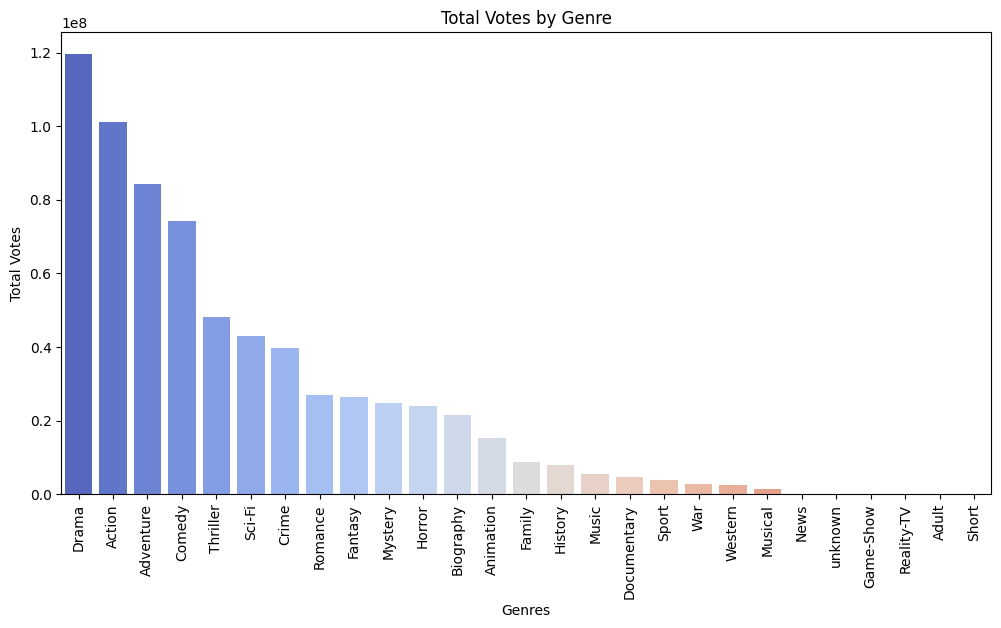

In [30]:
# Setting the figure size 
plt.figure(figsize=(12, 6))

# Creating a bar plot to show the total votes received by each genre
sns.barplot(x= genre_stats['genre'], y=genre_stats['total_votes'],  palette="coolwarm")

# Rotating x-axis labels
plt.xticks(rotation=90)

# Add Labels and Title
plt.xlabel("Genres")
plt.ylabel("Total Votes")
plt.title("Total Votes by Genre")

# Show plot
plt.show()

The bar plot above shows the total number of votes received by each genre.
The genres are sorted in descending order, with the genre receiving the most votes at the top.
The x-axis represents the genres, while the y-axis represents the total number of votes.
The plot provides a clear visual representation of which genres are most popular among viewers based on the number of votes.

In [53]:
# Counting the number of movies released in each year
movie_count=genre_df['start_year'].value_counts().sort_index()
movie_count

2010    11866
2011    12899
2012    13456
2013    14707
2014    15566
2015    15324
2016    15105
2017    14521
2018    12333
2019     3517
Name: start_year, dtype: int64

### Graph showing number of movies released over different years

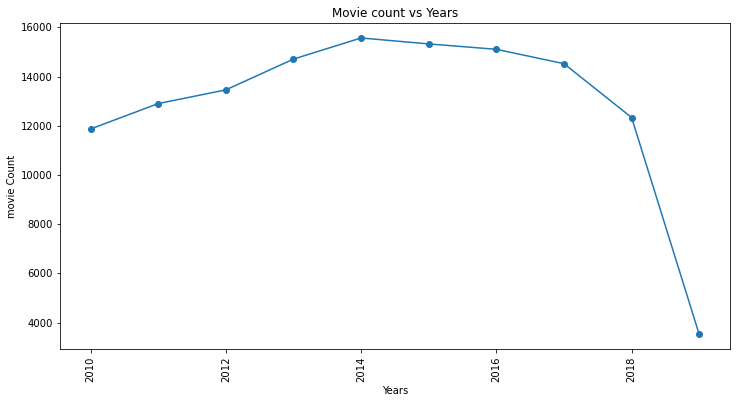

In [54]:
# Set the figure size
plt.figure(figsize=(12, 6))

# Plotting the number of movies released per year
plt.plot(movie_count.index,movie_count.values,marker='o')

# Rotating x-axis labels
plt.xticks(rotation=90)

# # Add Labels and Title
plt.xlabel("Years")
plt.ylabel("movie Count")
plt.title("Movie count vs Years")

# Show plot
plt.show()

From the year 2014 the number of movies realised has been dropping meaning people might been doing away with watching movies

### Boxplot of Ratings by Genre

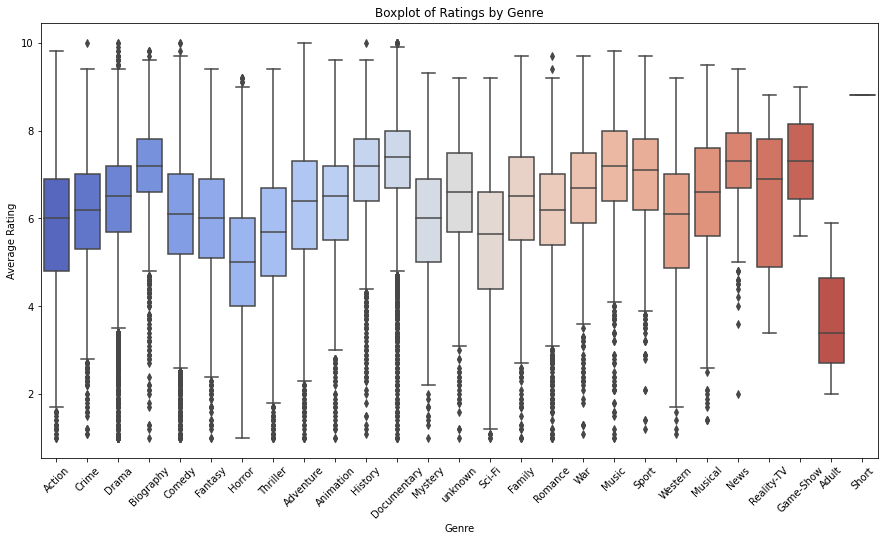

In [55]:
# Setting the figure size
plt.figure(figsize=(15,8))

# Creating a boxplot to show the distribution of movie ratings for each genre
sns.boxplot(x="genres", y="averagerating", data=genre_df, palette="coolwarm")

# Rotating x-axis labels
plt.xticks(rotation=45)

# Add Labels and Title
plt.title("Boxplot of Ratings by Genre")
plt.xlabel("Genre")
plt.ylabel("Average Rating")

# Show Plot
plt.show()


The boxplot provides a visual summary of the distribution of ratings across different genres, allowing for easy comparison of average ratings and variability within each genre.



#### Distribution of Ratings


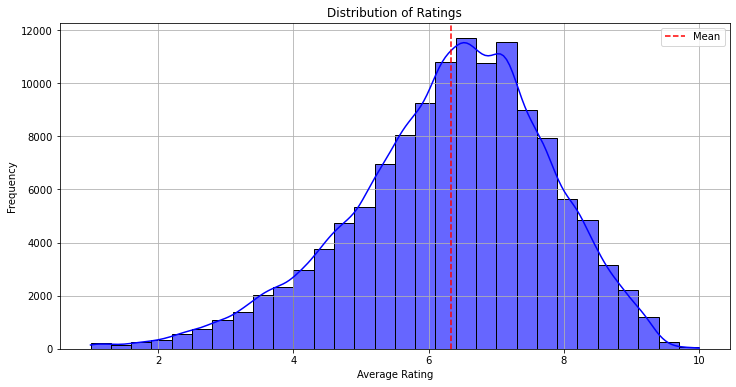

In [ ]:
# Setting the figue size
plt.figure(figsize=(12,6))

# Plotting the histogram of average movie ratings
sns.histplot(genre_df['averagerating'], kde=True, bins=30, color='blue', alpha=0.6)

# Adding a vertical line to indicate the mean rating
plt.axvline(mu, color='red', linestyle='--', label='Mean')

# Adding a legend to explain the mean
plt.legend()

# Add title and Labels
plt.title("Distribution of Ratings")
plt.xlabel("Average Rating")
plt.ylabel("Frequency")

# Add grid and show plot
plt.grid()
plt.show()

#### Top 5 Movie Genres and Total Number of Voters According To The Start Year

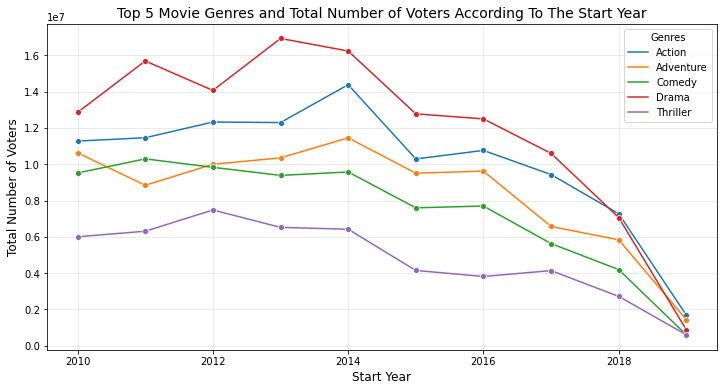

In [44]:
# Group by genre and get the top 5 with the highest total voters
top_genres = genre_df.groupby('genres')['numvotes'].sum().nlargest(5).index

# Filter data for only these top 5 genres
filtered_data = genre_df[genre_df['genres'].isin(top_genres)]

# Group by year and genre to get total votes per year
votes_over_years = filtered_data.groupby(['start_year', 'genres'])['numvotes'].sum().reset_index()

# Plot line chart
plt.figure(figsize=(12,6))
sns.lineplot(data=votes_over_years, x='start_year', y='numvotes', hue='genres', marker='o', palette='tab10')

# Labels and title
plt.xlabel('Start Year', fontsize=12)
plt.ylabel('Total Number of Voters', fontsize=12)
plt.title('Top 5 Movie Genres and Total Number of Voters According To The Start Year', fontsize=14)
plt.legend(title="Genres")
plt.grid(alpha=0.3)

# Show plot
plt.show()

#### Correlation Matrix
Here we are looking at the relationship between runtime and average rating

In [45]:
# Correlation matrix
plt.figure(figsize=(12, 8))
correlation_matrix = genre_df[['runtime_minutes','averagerating']].corr()
correlation_matrix

,runtime_minutes,averagerating
runtime_minutes,1.000000,-0.006039
averagerating,-0.006039,1.000000


<Figure size 864x576 with 0 Axes>

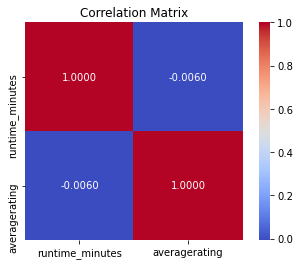

In [46]:
# explain the correlation matrix results

plt.title("Correlation Matrix")
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".4f", square=True)
plt.show()
# The correlation matrix shows the relationship between runtime and average rating. A positive correlation indicates that as one variable increases, the other tends to increase as well. A negative correlation indicates that as one variable increases, the other tends to decrease.
# In this case, the correlation coefficient between runtime and average rating is -0.oo6o39, indicating a very weak negative correlation. This suggests that as the runtime increases, the average rating tends to decrease.
# The correlation coefficient between budget and average rating is 0.000000, indicating no correlation. This suggests that there is no relationship between the two variables in this dataset.
# The heatmap visually represents the correlation matrix, with colors indicating the strength of the correlation. The darker the color, the stronger the correlation.

#### correlation_matrix
correlation between runtime and number of votes

In [47]:
# Correlation between runtime and number of votes
plt.figure(figsize=(12, 8))
correlation_matrix = genre_df[['runtime_minutes','numvotes']].corr()
correlation_matrix

,runtime_minutes,numvotes
runtime_minutes,1.000000,0.020029
numvotes,0.020029,1.000000


<Figure size 864x576 with 0 Axes>

In [48]:
# 0.020029 correlation between runtime and number of votes
- 0.020029
# The correlation coefficient between runtime and number of votes is 0.02, indicating a very weak positive correlation. This suggests that there is no strong relationship between the two variables in this dataset.

-0.020029

In [26]:
# Hypothesis Testing
# assume the average runtime is 95 minutes
# Null Hypothesis (H0): The average runtime of movies is 95 minutes.
# Alternative Hypothesis (H1): The average runtime of movies is not 95 minutes.

alpha = 0.05
# Sample mean
sample_mean = genre_df['runtime_minutes'].mean()
# Sample standard deviation
sample_std = genre_df['runtime_minutes'].std()
# Sample size
sample_size = genre_df['runtime_minutes'].count()
# Population mean
population_mean = 95
# Calculate the t-statistic
t_statistic = (sample_mean - population_mean) / (sample_std / np.sqrt(sample_size))
# Calculate the critical t-value
critical_t_value = stats.t.ppf(1 - alpha/2, df=sample_size - 1)
# Calculate the p-value
p_value = 2 * (1 - stats.t.cdf(abs(t_statistic), df=sample_size - 1))
# Print results
print(f"Sample Mean: {sample_mean}")
print(f"Sample Standard Deviation: {sample_std}")
print(f"Sample Size: {sample_size}")
print(f"Population Mean: {population_mean}")
print(f"T-statistic: {t_statistic}")
print(f"Critical T-value: {critical_t_value}")
print(f"P-value: {p_value}")
# Conclusion
if abs(t_statistic) > critical_t_value:
    print("Reject the null hypothesis. There is enough evidence to suggest that the average runtime of movies is not 95 minutes.")
else:
    print("Fail to reject the null hypothesis. There is not enough evidence to suggest that the average runtime of movies is not 95 minutes.")

Sample Mean: 95.04563987457232
Sample Standard Deviation: 156.45511593536932
Sample Size: 118953
Population Mean: 95
T-statistic: 0.10061028360251399
Critical T-value: 1.9599839278361608
P-value: 0.9198600025597417
Fail to reject the null hypothesis. There is not enough evidence to suggest that the average runtime of movies is not 95 minutes.


In [27]:
# Hypothesis testing - Are high-rated movies more popular?

high_rated = movies_df[movies_df["averagerating"] >= movies_df["averagerating"].median()]["numvotes"]
low_rated = movies_df[movies_df["averagerating"] < movies_df["averagerating"].median()]["numvotes"]
t_stat, p_value = stats.ttest_ind(high_rated, low_rated, equal_var=False)
print(f"T-test results: t-statistic = {t_stat}, p-value = {p_value}")
if p_value < 0.05:
    print("Reject the null hypothesis. There is enough evidence to suggest that high-rated movies are more popular than low-rated movies.")
else:
    print("Fail to reject the null hypothesis. There is not enough evidence to suggest that high-rated movies are more popular than low-rated movies.")

T-test results: t-statistic = 12.532795144319804, p-value = 5.653354818852952e-36
Reject the null hypothesis. There is enough evidence to suggest that high-rated movies are more popular than low-rated movies.


### Conclusion and Business Recommendations

1. **Top Genres by Average Rating:**
   - Drama (6.40 average rating, highest total votes at ~119.5M)
   - Adventure (6.19 average rating)
   - Documentary (high average rating of ~7.30)
2. **Most Popular Genres by Total Votes:**
    - Drama (~119.5M votes)
    - Action (~101.1M votes)
    - Adventure (significant vote count)
3. **Key Insights:**
    - Drama consistently performs well in both ratings and viewer engagement
    - Action movies get high viewer engagement despite slightly lower average ratings
    - Documentary shows high ratings but lower total votes, indicating a niche but appreciative audience
4. **Recommendations for the New Studio:**
    - **Primary Focus:**
        - Consider Drama as a primary genre due to its consistent high performance in both ratings and viewer engagement
        - Action-Adventure combinations could be profitable due to high viewer engagement
    - **Strategic Opportunities:**
        - Look into hybrid genres (e.g., Drama-Action) to maximize appeal
        - Consider Documentary features as lower-budget, high-quality projects
    - **Risk Management:**
        - Start with Drama genre as it shows the most stable performance
        - Gradually expand into Action and Adventure genres as these may require higher budgets but show strong viewer engagement
        - Documentary genre could be a good option for a low-budget project that appeals to a smaller audience